# LISTA 4

Zadanie $1$

Napisz funkcję znajdującą (z zadaną dokładnością) miejsce zerowe zadanej przez użytkownika funkcji w zadanym przedziale metodą bisekcji.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy.solvers as sol
import sympy as sym
import numpy as np
from sympy import Symbol
import math
from scipy import misc


In [2]:
def bisekcja(f, a, b, tol): 
    #za f podstawiamy wzór funkcji, którą chcemy obliczyć, stosujemy komendę lambda
    # a i b to kolejno lewy i prawy koniec sprawdzanego przedziału (to jest przedział domknięty)
    #określenie rozwinięcia dzisiętnego
    
    # sprawdzamy znak wartości funkcji w punkcie a i b
    if np.sign(f(a)) == np.sign(f(b)):
        return "Nie można zastosować tutaj metody bisekcji"
        
    # punkt środkowy między a i b
    m = (a + b)/2
    
    #określenie rozwinięcia dziesiętnego
    if np.abs(f(m)) < tol:
        return m
    
    elif np.sign(f(a)) == np.sign(f(m)):
        return bisekcja(f, m, b, tol)
    
    elif np.sign(f(b)) == np.sign(f(m)):
        return bisekcja(f, a, m, tol)

In [3]:
bisekcja(lambda x: x**3 - 2, -2, 2, 0.001)

1.259765625

Przykładowe funkcje obliczone metodą bisekcji:

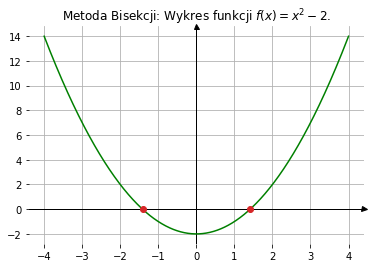

In [4]:
f= lambda x: x**2 - 2
x1 = bisekcja(f, 0, 2, 0.01)
x2 = bisekcja(f, -2, 0, 0.01)
x = np.linspace(-4.0, 4.0, 1000)
ax = plt.gca()
for line in ["left", "right", "bottom", "top"]:
    ax.spines[line].set_visible(False)
ax.plot((1), (0), ls="", marker=">", ms=5, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=5, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.axhline(0, color='black',linewidth=1)
ax.axvline(0, color='black', linewidth=1)
plt.grid()
plt.plot(x, f(x), color = "green")
plt.title('Metoda Bisekcji: Wykres funkcji $f(x) = x^2 - 2$.')
plt.plot(x1,0, "o", c = 'C3')
plt.plot(x2,0, "o", c= 'C3')

In [5]:
funkcja = lambda x: x**2 - 2
od = 0.
do = 2.0
t = 0.0001

bisekcja(funkcja, od, do, t)

1.4141845703125

In [6]:
funkcja = lambda x: x**2 - 2
od = -2.0
do = 2.0
t = 0.0001

bisekcja(funkcja, od, do, t) #tu nie działa, bo nie policzy dwóch miejsc zerowych na raz

'Nie można zastosować tutaj metody bisekcji'

Zadanie $2$

Napisz funkcję znajdująca (w przybliżeniu) miejsca zerowe zadanej przez użytkownika funkcji "w pobliżu" podanego punktu metodą startową metodą Newtona. Optymalne rozwiązywanie rysuje kolejne etapy znajdowania rozwiązania (styczne od punktu styczności do punktu przecięcia z osią OX)

In [7]:
def newton1(f, x, tolerancja=0.001):
    while True:
        x1 = x - f(x) / misc.derivative(f, x) 
        t = abs(x1 - x)
        if t < tolerancja:
            break
        x = x1
    return x


def f(x):
    return x**2 - 2

x = 1

x0 = newton1(f, x)

print('x: ', x)
print('x0: ', x0)
print("f(x0) = ", (x0**2 - 2))

x = -1

x0 = newton1(f, x)

print('x: ', x)
print('x0: ', x0)
print("f(x0) = ", (x0**2 - 2))

x:  1
x0:  1.4142156862745099
f(x0) =  6.007304882871267e-06
x:  -1
x0:  -1.4142156862745099
f(x0) =  6.007304882871267e-06


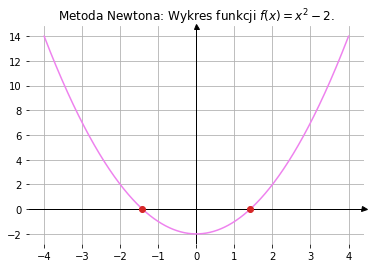

In [8]:
y= lambda x: x**2 - 2
x1 = newton1(f, -1, 0.01)
x2 = newton1(f, 1, 0.01)
x = np.linspace(-4.0, 4.0, 1000)
ax = plt.gca()
for line in ["left", "right", "bottom", "top"]:
    ax.spines[line].set_visible(False)
ax.plot((1), (0), ls="", marker=">", ms=5, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=5, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.axhline(0, color='black',linewidth=1)
ax.axvline(0, color='black', linewidth=1)
plt.grid()
plt.plot(x, f(x), color = "violet")
plt.title('Metoda Newtona: Wykres funkcji $f(x) = x^2 - 2$.')
plt.plot(x1,0, "o", c = 'C3')
plt.plot(x2,0, "o", c= 'C3')

Zadanie $3$

Wykorzystaj obie napisane funkcje do rozwiązania równania $x-2 = lnx$, a następnie porównaj otrzymane wyniki z rozwiązaniem uzyskanym wbudowaną funkcją *solve*.

 x1= 0.15625 , 
 x2= 3.25


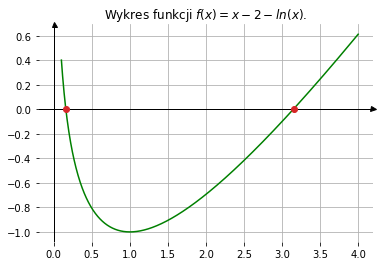

In [9]:
#sposób z wykorzystaniem funkcji "bisekcja"
ln = lambda x: x - 2 - np.log(x)
print(" x1=",bisekcja(ln, 0.1, 1, 0.1), ", \n","x2=", bisekcja(ln, 3, 4, 0.1))
x1 = bisekcja(ln, 0.1, 1, 0.01)
x2 = bisekcja(ln, 3, 4, 0.01)
x = np.linspace(0.1, 4.0, 1000)
ax = plt.gca()
for line in ["left", "right", "bottom", "top"]:
    ax.spines[line].set_visible(False)
ax.plot((1), (0), ls="", marker=">", ms=5, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=5, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.axhline(0, color='black',linewidth=1)
ax.axvline(0, color='black', linewidth=1)
plt.grid()
plt.plot(x, ln(x), color = "green")
plt.title('Wykres funkcji $f(x) = x -2 - ln(x)$.')
plt.plot(x1,0, "o", c = 'C3')
plt.plot(x2,0, "o", c= 'C3')

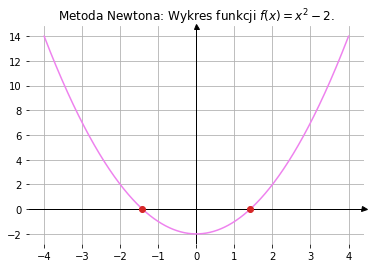

In [10]:
y= lambda x: x - 2 - np.log(x)
x1 = newton1(f, 3, 0.01)
x2 = newton1(f, -1, 0.01)
x = np.linspace(-4.0, 4.0, 1000)
ax = plt.gca()
for line in ["left", "right", "bottom", "top"]:
    ax.spines[line].set_visible(False)
ax.plot((1), (0), ls="", marker=">", ms=5, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=5, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.axhline(0, color='black',linewidth=1)
ax.axvline(0, color='black', linewidth=1)
plt.grid()
plt.plot(x, f(x), color = "violet")
plt.title('Metoda Newtona: Wykres funkcji $f(x) = x^2 - 2$.')
plt.plot(x1,0, "o", c = 'C3')
plt.plot(x2,0, "o", c= 'C3')

In [11]:
#sposób z wykorzystaniem funkcji "solve"
x = Symbol('x')
y1=sol.solve(x**2 - 2, x)
print(y1) #dla paraboli działa
y2 = sol.solve(x - 2 - sym.log(x) + x)
print(y2) #dla tej śmieszej funkcji działa, ale po swojemu

[-sqrt(2), sqrt(2)]
[1, -LambertW(-2*exp(-2))/2]


In [12]:
#sposób z wykorzystaniem funkcji "newton"
def newton(f, x, tolerancja=0.1):
    while True:
        dx = misc.derivative(f, x) 
        x1 = ((x * dx) - f(x))/dx
        t = abs(x1 - x)
        if t < tolerancja:
            break
        x = x1
    return x


def f(x):
    return x - 2 - np.log(x)

x = 3.5
x0 = newton(f, x)

print('x: ', x)
print('x0: ', x0)
print("f(x0) = ", (x0**2 - 2))

#x = 5

#x0 = newton(f, x)

#print('x: ', x)
#print('x0: ', x0)
#print("f(x0) = ", (x0**2 - 2))


x:  3.5
x0:  3.149858806229873
f(x0) =  7.921610499183881


Zadanie $4$

Wykorzystaj obie napisane funkcje do wyznaczenia graficznie rzędów obu metod (metody bisekcji oraz metody Newtona).

In [25]:
global iks
def bisekcja(f, a, b, tol): 
    #za f podstawiamy wzór funkcji, którą chcemy obliczyć, stosujemy komendę lambda
    # a i b to kolejno lewy i prawy koniec sprawdzanego przedziału (to jest przedział domknięty)
    #określenie rozwinięcia dzisiętnego
    # sprawdzamy znak wartości funkcji w punkcie a i b
    if np.sign(f(a)) == np.sign(f(b)):
        return "Nie można zastosować tutaj metody bisekcji"
        
    # punkt środkowy między a i b
    m = (a + b)/2
    iks.append(m)
    #określenie rozwinięcia dziesiętnego
    if np.abs(f(m)) < tol:
        return iks
    
    elif np.sign(f(a)) == np.sign(f(m)):

        return bisekcja(f, m, b, tol)
        
    elif np.sign(f(b)) == np.sign(f(m)):
        return bisekcja(f, a, m, tol)

In [26]:
x = bisekcja(lambda x: x**2 - 4, 0, 3, 0.1)
print(x)

[1.5, 2.25, 1.875, 2.0625, 1.96875, 2.015625, 1.5, 2.25, 1.875, 2.0625, 1.96875, 2.015625, 1.5, 2.25, 1.875, 2.0625, 1.96875, 2.015625]


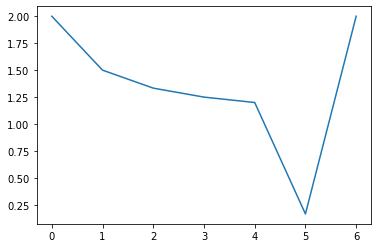

In [27]:
f = lambda a : x**2 - 4
alfa=2
y=[np.log(abs(x[i+1]-alfa))/np.log(abs(x[i]-alfa)) for i in range(0,7)]
plt.plot(y)
plt.show()

#alfa2= -2
#fp = lambda a : x - a - np.log(a)

In [6]:
global X
def newton(f, x, tolerancja=0.1):
    while True:
        dx = misc.derivative(f, x) 
        x1 = ((x * dx) - f(x))/dx
        t = abs(x1 - x)
        if t < tolerancja:
            break
        x = x1
        
    return X


def f(x):
    return x**2 - 4

x = 15
x0 = newton(f, x)

print('x: ', x)
#print('x0: ', x0)
#print("f(x0) = ", (x0**2 - 2))
print(X)



x:  15
[2.9, 2.1396551724137933, 2.0045576426130207, 2.0000051812194735, 2.9, 2.1396551724137933, 2.0045576426130207, 2.0000051812194735]


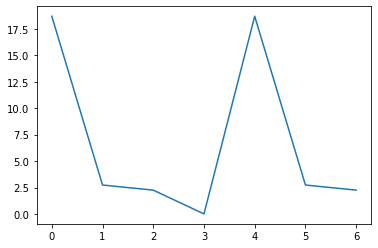

In [8]:
f = lambda a : x**2 - 4
alfa=2
y=[np.log(abs(x0[i+1]-alfa))/np.log(abs(x0[i]-alfa)) for i in range(0,7)]
plt.plot(y)
plt.show()

Zadanie $5$

Zainstaluj pakiet SageMath